⏳ Prétraitement en cours...
✅ X_train shape : (27455, 28, 28, 1)
✅ X_test shape : (7172, 28, 28, 1)


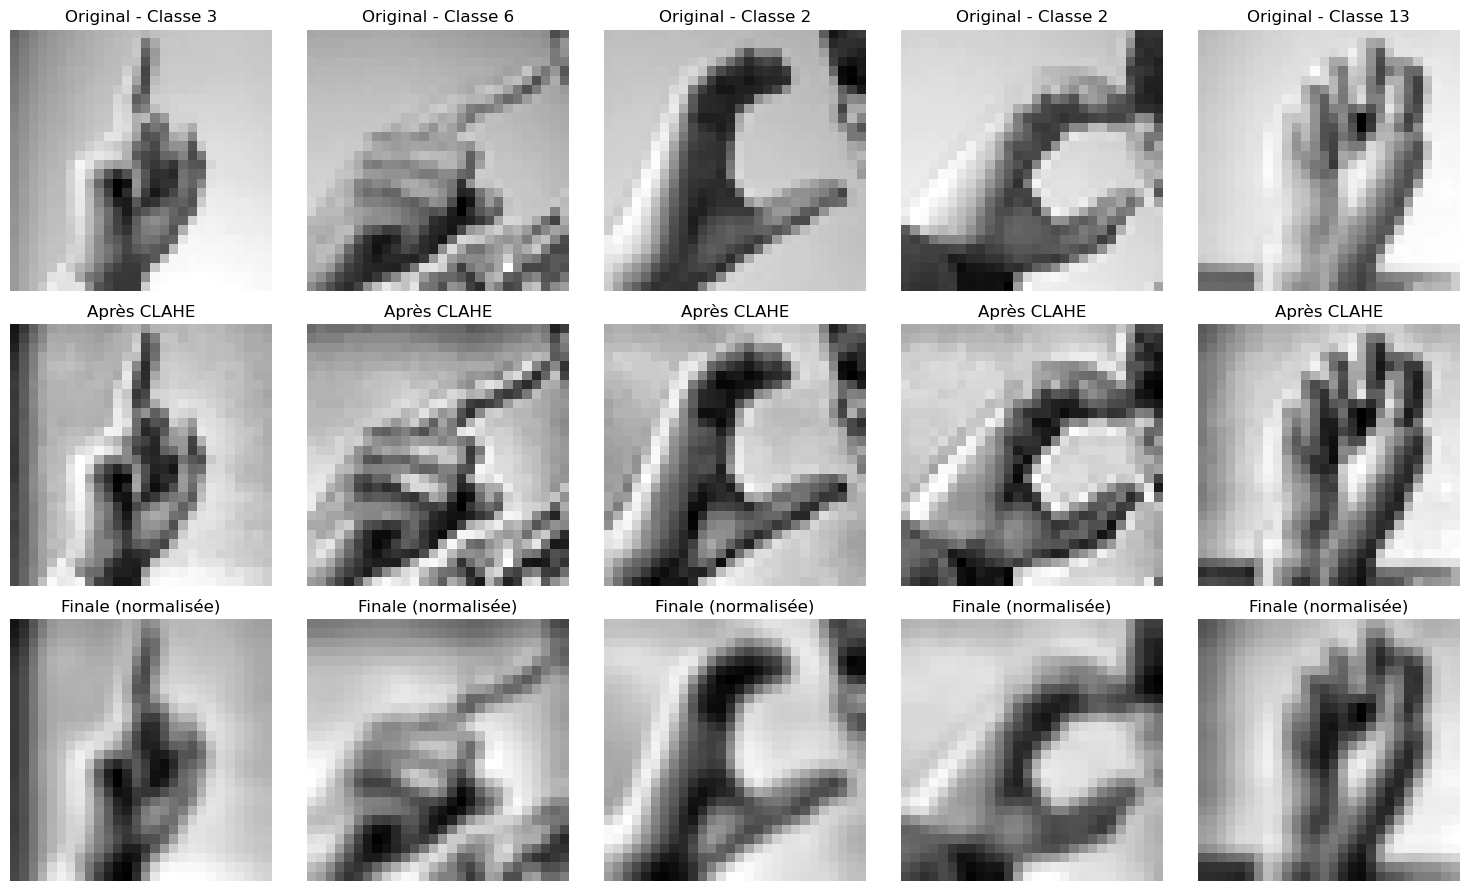

✅ Données prétraitées sauvegardées dans data/processed/


In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Charger les données
train_df = pd.read_csv('data/raw/sign_mnist_train.csv')
test_df = pd.read_csv('data/raw/sign_mnist_test.csv')

# Séparer features et labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Fonction de prétraitement
def preprocess_images(X):
    """
    Prétraite les images avec OpenCV
    
    Étapes :
    1. Reshape en 28x28
    2. Normalisation [0, 1]
    3. Égalisation d'histogramme (améliore le contraste)
    4. Filtrage (réduction du bruit)
    5. Reshape pour CNN (ajout dimension channel)
    """
    processed = []
    
    for img_flat in X:
        # Reshape en image 28x28
        img = img_flat.reshape(28, 28).astype(np.uint8)
        
        # Égalisation d'histogramme CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
        img = clahe.apply(img)
        
        # Filtrage gaussien pour réduire le bruit
        img = cv2.GaussianBlur(img, (3, 3), 0)
        
        # Normalisation
        img = img / 255.0
        
        processed.append(img)
    
    # Convertir en array et ajouter dimension channel
    processed = np.array(processed)
    processed = processed.reshape(-1, 28, 28, 1)
    
    return processed

# Appliquer le prétraitement
print("⏳ Prétraitement en cours...")
X_train_processed = preprocess_images(X_train)
X_test_processed = preprocess_images(X_test)

print(f"✅ X_train shape : {X_train_processed.shape}")
print(f"✅ X_test shape : {X_test_processed.shape}")

# Visualiser l'effet du prétraitement
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for i in range(5):
    # Image originale
    axes[0, i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f"Original - Classe {y_train[i]}")
    axes[0, i].axis('off')
    
    # Image après CLAHE
    img_clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4)).apply(
        X_train[i].reshape(28, 28).astype(np.uint8)
    )
    axes[1, i].imshow(img_clahe, cmap='gray')
    axes[1, i].set_title("Après CLAHE")
    axes[1, i].axis('off')
    
    # Image finale
    axes[2, i].imshow(X_train_processed[i, :, :, 0], cmap='gray')
    axes[2, i].set_title("Finale (normalisée)")
    axes[2, i].axis('off')

plt.tight_layout()
plt.savefig('results/plots/preprocessing_comparison.png', dpi=150)
plt.show()

# Sauvegarder les données prétraitées
np.save('data/processed/X_train.npy', X_train_processed)
np.save('data/processed/X_test.npy', X_test_processed)
np.save('data/processed/y_train.npy', y_train)
np.save('data/processed/y_test.npy', y_test)

print("✅ Données prétraitées sauvegardées dans data/processed/")